Data Gathering Lab 2
--------------------

Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%autoreload     # This is Jupyter notebook that will reload changed files
from crawler import Crawler
from crawler_state import CrawlerState
from crawler_abst_api import CrawlerAbstractAPI
from crawler_my_api import MyAPI

## Note on Nodes
Nodes in the network have special bookkeeping attributes. These should not be changed. The content attributes will vary based on your specific application.
### Bookkeeping Attributes
- `id` -- attribute based on the order instantiated via the crawl. Note that it must be converted from a number to a string so that it can be read back in again from GraphML.
- `_expanded` -- 1 if the nodes children have been generated
- `_depth` -- the distance of this node from the origin node or nodes

### Content Attributes
It's a silly example where users have random names and associated random planets. Users are connected via a small number of randomly-generated tags.
- `label` -- the name of the user (user nodes only) or the tag string (tag nodes only)
- `planet` -- the planet the user is from (user nodes only)
- `bipartite` -- will be 0 from users and 1 for tags


# Tests for MyAPI
Not very rigorous testing

In [3]:
api = LabAPI()
c = Crawler(2, api)

In [4]:
setup = api.initial_node()
if setup[0] == '#Foo' and setup[1] == '100':
    print('initial_node seems to be working')

initial_node seems to be working


In [5]:
names_query = api.make_names_url('#Foo Bar')
if names_query == 'http://josquin.cti.depaul.edu/~rburke/cgi-bin/get-users.py?q=%23Foo+Bar':
    print('make_names_url seems to be working')

make_names_url seems to be working


In [6]:
tags_query = api.make_tags_url('John Doe')
if tags_query == 'http://josquin.cti.depaul.edu/~rburke/cgi-bin/get-tags.py?q=John+Doe':
    print('make_tags_url seems to be working')
tags_query

make_tags_url seems to be working


'http://josquin.cti.depaul.edu/~rburke/cgi-bin/get-tags.py?q=John+Doe'

In [7]:
user_node = api.make_node_user("John Doe", "Earth", 1)
if c._net.nodes[user_node]['planet'] == "Earth":
    print('make_node_user seems to be working')

make_node_user seems to be working


In [8]:
tag_node = api.make_node_tag('#Foo Bar', 1)
if (c._net.nodes[tag_node]['label'] == '#Foo Bar'):
    print('make_node_tag seems to be working')

make_node_tag seems to be working


In [9]:
result = api.execute_names_query('#Foo')
if result[0] and type(result[1] is list):
    print('execute_names_query seems to be working')

execute_names_query seems to be working


In [10]:
result = api.execute_tags_query('John Doe')
if result[0] and type(result[1] is list):
    print('execute_tags_query seems to be working')

execute_tags_query seems to be working


# For the Lab

In [11]:
api = LabAPI()
c = Crawler(3, api)
c.initialize()

In [12]:
c.crawl_k(2)

Expanding node: 100
Expanding node: 101


True

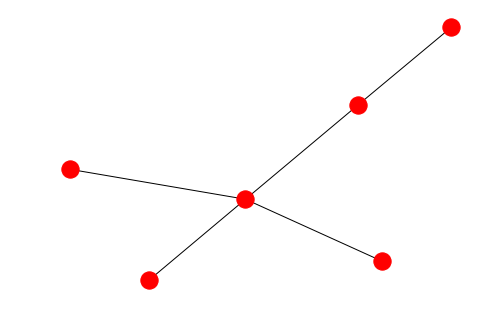

In [13]:
nx.draw(c._net)

In [14]:
c._state._open

deque(['102', '103', '104', '105'])

In [15]:
list(c._net.nodes(data=True))[1:5]

[('101',
  {'_depth': 1,
   '_expanded': 1,
   'bipartite': 0,
   'label': 'oZcV',
   'planet': 'BHSO_4551'}),
 ('102',
  {'_depth': 1,
   '_expanded': 0,
   'bipartite': 0,
   'label': 'khCu',
   'planet': 'SZOM_6159'}),
 ('103', {'_depth': 2, '_expanded': 0, 'bipartite': 1, 'label': '#ab'}),
 ('104', {'_depth': 2, '_expanded': 0, 'bipartite': 1, 'label': '#af'})]

In [16]:
c._state._visited0

{'khCu': '102', 'oZcV': '101'}

In [17]:
c._state._visited1

{'#Foo': '100', '#ab': '103', '#af': '104', '#aj': '105'}

In [18]:
c.to_files("out.graphml", "out.json")
len(c._net.nodes())

6

In [19]:
c2 = Crawler(5, api)
c2.from_files("out.graphml", "out.json")

In [20]:
c2.crawl_k(15)

Expanding node: 102
API call failed on node 102. Error 1.
{'label': 'khCu', 'bipartite': 0, '_depth': 1, '_expanded': 0, 'planet': 'SZOM_6159'}
Expanding node: 102
Expanding node: 103
Expanding node: 104
Expanding node: 105
Expanding node: 106
Expanding node: 107
Expanding node: 108
Expanding node: 109
Expanding node: 110
Expanding node: 111
Expanding node: 112
Expanding node: 113
Expanding node: 114
Expanding node: 115
Expanding node: 116


True

In [21]:
list(c2._net.nodes(data=True))

[('100', {'_depth': 0, '_expanded': 1, 'bipartite': 1, 'label': '#Foo'}),
 ('101',
  {'_depth': 1,
   '_expanded': 1,
   'bipartite': 0,
   'label': 'oZcV',
   'planet': 'BHSO_4551'}),
 ('102',
  {'_depth': 1,
   '_expanded': 1,
   'bipartite': 0,
   'label': 'khCu',
   'planet': 'SZOM_6159'}),
 ('103', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#ab'}),
 ('104', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#af'}),
 ('105', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#aj'}),
 ('106', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#ai'}),
 ('107', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#ag'}),
 ('108', {'_depth': 2, '_expanded': 1, 'bipartite': 1, 'label': '#ad'}),
 ('109',
  {'_depth': 3,
   '_expanded': 0,
   'bipartite': 0,
   'label': 'eREt',
   'planet': 'CUFO_0809'}),
 ('110',
  {'_depth': 3,
   '_expanded': 0,
   'bipartite': 0,
   'label': 'bbZi',
   'planet': 'UKNI_3077'}),
 ('111',
  {'_depth': 3,
   '_expanded': 0,


In [22]:
len(c2._net.nodes())

29

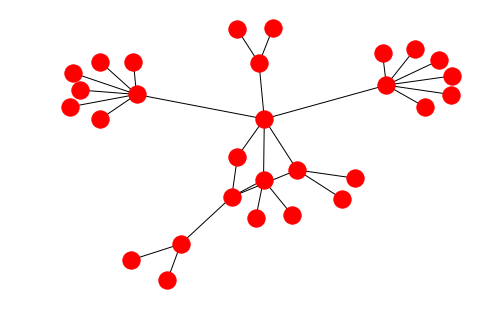

In [23]:
nx.draw(c2._net)

In [24]:
labels = [data['label'] for node, data in c2._net.nodes(data=True)]
labels

['#Foo',
 'oZcV',
 'khCu',
 '#ab',
 '#af',
 '#aj',
 '#ai',
 '#ag',
 '#ad',
 'eREt',
 'bbZi',
 'CbzR',
 'aGUg',
 'uFoD',
 'BOGJ',
 'AHzR',
 'tite',
 'yXnH',
 'YtVo',
 'HhvN',
 'XRfX',
 'rLqS',
 'RlLf',
 'vbIx',
 'PSjr',
 'aJOZ',
 'MhWL',
 'XGUd',
 'gtRH']

In [25]:
c3 = Crawler(3, api)
c3.initialize()
c3.set_autosave(5, "save/")

In [26]:
c3.crawl_k(10)

Expanding node: 100
Expanding node: 101
Expanding node: 102
Expanding node: 103
Expanding node: 104
Autosaving...
Expanding node: 105
Expanding node: 106
Expanding node: 107
Expanding node: 108
Expanding node: 109
Autosaving...


True